# Physics 21, Spring 2020
## Assignment 3: LIGO Inspirals

In [40]:
from astropy import constants as c
from matplotlib import pyplot as pl
from astropy import units as u
import numpy as np
from scipy.optimize import fsolve, root_scalar
import copy

# Question 1

In [3]:
c.M_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.988409870698051e+30 uncertainty=4.468805426856864e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2018'>

In [4]:
c.m_n

<<class 'astropy.constants.codata2018.CODATA2018'> name='Neutron mass' value=1.67492749804e-27 uncertainty=9.5e-37 unit='kg' reference='CODATA 2018'>

In [5]:
c.m_p

<<class 'astropy.constants.codata2018.CODATA2018'> name='Proton mass' value=1.67262192369e-27 uncertainty=5.1e-37 unit='kg' reference='CODATA 2018'>

In [6]:
1.6 * c.M_sun / ((c.m_p + c.m_p) / 2)

<Quantity 1.90207706e+57>

From the assignment, we know that the mass of a neutron star is about $1-2.2$ $M_\odot$ ~ 1.6 $M_\odot$. As mass of neutron stars is almost entirely just due to protons and neutrons (which are approximately the same mass), we can write the number of nucleons in the neutron star to be $$\frac{1.6 M_\odot}{(m_n + m_p) / 2} \approx 2 \times 10^{57}$$

# Question 2

In [7]:
c.R_sun.to('km')

<Quantity 695700. km>

In [8]:
(2 * c.G * 30 * c.M_sun / c.c ** 2).to('km')

<Quantity 88.59750228 km>

Radius of the Sun = $6.957\times 10^5$ km. 

Radius of neutron stars ~ 10 km.

Radius (Schwarzschild) of black holes (~ 30 $M_\odot$) ~ 90 km.

# Question 3

In [9]:
c.M_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.988409870698051e+30 uncertainty=4.468805426856864e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2018'>

In [10]:
c.G

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

In [11]:
c.c

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

In [12]:
(c.M_sun * c.G / c.c ** 2).to("km")

<Quantity 1.47662504 km>

In [13]:
(c.M_sun * c.G / c.c ** 3).to("s")

<Quantity 4.92549095e-06 s>

Mass of Sun (in standard mass units) = $2 \times 10^{30}$ kg 

We use the conversion factor $G/c^2$. Mass of Sun (in standard length units) = $1.5$ km

We use the conversion factor $G/c^3$. Mass of Sun (in standard time units) = $5 \times 10^{-6}$ s 

# Question 4

Frequency of gravitational wave emission is twice the orbital frequency, that is $f_{GW} = 2 f_o$. As time period $T = 1/f$, we get that 0.1 s = $T_o = 1/f_o = 2 / f_{GW}$. Finally, this gives us frequency of GWs emitted is 20 Hz.

# Question 5

In [14]:
T = 0.1 * u.s
m1 = 1.4 * c.M_sun
m2 = 1.4 * c.M_sun

By Kepler's Third law, $\frac{a^3}{T^2} = \frac{G (m_1 + m_2)}{4\pi^2}$. So, we can write $a = (\frac{G (m_1 + m_2)T^2}{4\pi^2})^{1/3}$.

In [15]:
a = (((c.G * (m1 + m2) * T ** 2) / (4 * np.pi ** 2)) ** (1/3))
a.to('km')

<Quantity 454.8867738 km>

So, semi-major axis is $a$ ~ 455 km, while the radial separation between the two neutron stars is $2s$ ~ 910 km.

To get velocity, we note that as we have circular orbits ($\dot{r}$ = 0), the gravitational force provides the centripedal force needed. Thus, $\frac{G m_1 m_2}{d^2} = \frac{m_1 v^2}{r}$, or $v^2 = \frac{G m_2 a}{(2a)^2} = \frac{G m}{4a}$.

In [16]:
v = (c.G * m1 / (4 * a)) ** (1/2)
v.to('km/s')

<Quantity 10105.04343048 km / s>

In [17]:
v / c.c

<Quantity 0.0337068>

So, we get a velocity $v \approx 10^{5}$ km/s and $v/c \approx 0.034$. 

# Question 6

In [18]:
ke = 1/2 * (m1 + m2) * v ** 2
ke.to('erg')

<Quantity 2.84256441e+51 erg>

In [19]:
pe = - c.G * m1 * m2 / (2 * a)
pe.to('erg')

<Quantity -5.68512883e+51 erg>

So, we get that Kinetic Energy $T \approx 2.84 \times 10^{51}$ erg, and Potential Energy $V \approx - 5.69 \times 10^{51}$ erg.

In [20]:
L = m1 * v * a + m2 * v * a
L

<Quantity 2.55920712e+43 kg m2 / s>

Angular momentum $L \approx 2.56 \times 10^{43}$ kg m$^2$/ s.

# Question 7

In [21]:
a_ICSO = 6 * c.G * m1 / (c.c ** 2)
a_ICSO.to('km')

<Quantity 12.40365032 km>

ICSO is the smallest circular orbit (lowest possible radius $r$) at which a test particle may orbit a massive object, for general relativity. $a_{ICSO} = \frac{6GM}{c^2}$. For our case with $M = 1.4 M_\odot$, we have $a_{ICSO} = 12.4$ km.

# Question 8

Again, from Kepler's Third law, we have $\frac{a^3}{T^2} = \frac{G (m_1 + m_2)}{4\pi^2}$. So, we can write $T = (\frac{4\pi^2 a^3}{G (m_1 + m_2)})^{1/2}$.

In [22]:
T_ICSO = (4 * np.pi ** 2 * a_ICSO ** 3 / (c.G * (m1 + m2))) ** (1/2)
T_ICSO

<Quantity 0.00045027 s>

In [23]:
f_ICSO = 1/T_ICSO
f_ICSO.to('Hz')

<Quantity 2220.90863665 Hz>

In [24]:
fGW_ICSO = 2 * f_ICSO
fGW_ICSO.to('Hz')

<Quantity 4441.8172733 Hz>

We get: time period $T = 0.00045$ s, orbital frequency $f_o = 2220.9$ Hz, and GW frequency $4441.8$ Hz.

# Question 9

In [25]:
(2 * a_ICSO).to('km')

<Quantity 24.80730064 km>

We have semi-major axis $a_{ICSO} = 12.4$ km, and radial separation $2 a_{ICSO} = 24.8$ km.

To get velocity, we note that as we have circular orbits ($\dot{r}$ = 0), the gravitational force provides the centripedal force needed. Thus, $\frac{G m_1 m_2}{d^2} = \frac{m_1 v^2}{r}$, or $v^2 = \frac{G m_2 a}{(2a)^2} = \frac{G m}{4a}$.

In [26]:
v_ICSO = (c.G * m1 / (4 * a_ICSO)) ** (1/2)
v_ICSO.to('km/s')

<Quantity 61194.87923623 km / s>

In [27]:
v_ICSO / c.c

<Quantity 0.20412415>

So, we get a velocity $v_{ICSO} \approx 6.12 \times 10^{5}$ km/s and $v_{ICSO}/c \approx 0.20$. 

# Question 10

In [28]:
ke_ICSO = 1/2 * (m1 + m2) * v_ICSO ** 2
ke_ICSO.to('erg')

<Quantity 1.04247131e+53 erg>

In [29]:
pe_ICSO = - c.G * m1 * m2 / (2 * a_ICSO)
pe_ICSO.to('erg')

<Quantity -2.08494261e+53 erg>

So, we get that Kinetic Energy $T_{ICSO} \approx 1.04 \times 10^{53}$ erg, and Potential Energy $V_{ICSO} \approx - 2.08 \times 10^{53}$ erg.

In [30]:
L_ICSO = m1 * v_ICSO * a_ICSO + m2 * v_ICSO * a_ICSO
L_ICSO

<Quantity 4.22599071e+42 kg m2 / s>

Angular momentum $L_{ICSO} \approx 4.23 \times 10^{42}$ kg m$^2$/ s

# Question 11 

In [41]:
E_ICSO = pe_ICSO + ke_ICSO
E = ke + pe
deltaE = E_ICSO - E
deltaE.to('erg')

<Quantity -1.01404566e+53 erg>

As this term is negative, this $|\Delta E| = 1.01 \times 10^{53}$ erg is lost, in the form of gravitational wave radiation. 

# Question 12

In [42]:
flux = np.abs(deltaE) / (4 * np.pi * (1 * u.Mpc) ** 2)
flux.to('J/m^2')

<Quantity 0.84751337 J / m2>

We assume that this energy $|\Delta E|$ is radiated in a spherically symmetrical manner. Then, the flux (energy per unit area) at $D=1$ Mpc is given as: $\frac{|\Delta E|}{4\pi D^2} = 0.85$ J/m$^2$.

# Question 13

We first define the functions `getVs` and `getKEandPE`, which are designed more generally (not specifically for $m_1=m_2$). Notably, $\frac{G m_1 m_2}{d^2} = \frac{m_1 v_1^2}{r_1}$, or $v_1^2 = \frac{G m_2 r_1}{d^2}$

In [43]:
def getVs(a, m1, m2):
    M = m1 + m2
    d = 2 * a
    r1, r2 = m2 * d / M, m1 * d / M
    v1 = (c.G * m2 * r1 / (d ** 2)) ** (1/2)
    v2 = (c.G * m1 * r2 / (d ** 2)) ** (1/2)
    return v1, v2

def getKEandPE(a, m1, m2, v1, v2):
    ke = 1/2 * m1 * v1 ** 2 + 1/2 * m2 * v2 ** 2
    pe = - c.G * m1 * m2 / (2 * a) 
    return (ke, pe)

def getfGW(a, m1, m2):
    T = (4 * np.pi ** 2 * a ** 3 / (c.G * (m1 + m2))) ** (1/2)
    return 2 / T

We use the `getDeltaE` function to fit for the orbital separation $a$ from the new $E$ values (using `scipy.optimize.root_scalar`). 

In [44]:
def getDeltaE(a, E):
    ke, pe = getKEandPE(a, m1, m2, *(getVs(a, m1, m2)))
    return (ke + pe - E).value

In [53]:
getDeltaE(a, E), a, E

(0.0, <Quantity 454886.77379697 m>, <Quantity -2.84256441e+44 kg m2 / s2>)

In [55]:
root_scalar(getDeltaE, args = (E), x0 = a / 2, x1 = a * 2)

      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: <Quantity 454886.77379697 m>

Now, we iterate 3200 times in steps of $dt = 0.025$ s, and evolve the system in time using the given equation for time derivative of energy. 

In [90]:
M = m1 + m2
mu = m1 * m2 / M

t_s, a_s, fGW_s, v1c_s, v2c_s, ke_s, pe_s, te_s, num_cy = [], [], [], [], [], [], [], [], [0]

a0 = copy.deepcopy(a)
E0 = copy.deepcopy(E)
t0 = 0 * u.s

dt = 0.025 * u.s
N = 3200

In [91]:
for i in range(N):
    if i % 200 == 0:
        print(i)
    v10, v20 = getVs(a0, m1, m2)
    ke0, pe0 = getKEandPE(a0, m1, m2, v10, v20)
    fGW0 = getfGW(a0, m1, m2)
    
    t_s += [t0.value]
    a_s += [a0.value]
    fGW_s += [fGW0.value]
    v1c_s += [(v10 / c.c).value]
    v2c_s += [(v20 / c.c).value]
    ke_s += [ke0.value]
    pe_s += [pe0.value]
    te_s += [(ke0 + pe0).value]
    num_cy += [num_cy[-1] + (fGW0.value * dt.value)]
    
    t0 += dt
    E0 += dt * (-32 * c.G ** 4 * mu ** 2 * M ** 3 / (5 * (c.c * a0) ** 5))
    a0 = root_scalar(getDeltaE, args = (E0), x0 = a0 / 2, x1 = a0 * 2).root
    if np.isnan(a0):
        break

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000


In [102]:
len(a_s), len(a_s) * dt

(3164, <Quantity 79.1 s>)

Thus, the parameters blow up at ~ 79.1 seconds. This is because the time is the approximate epoch of the merger.

<IPython.core.display.Javascript object>


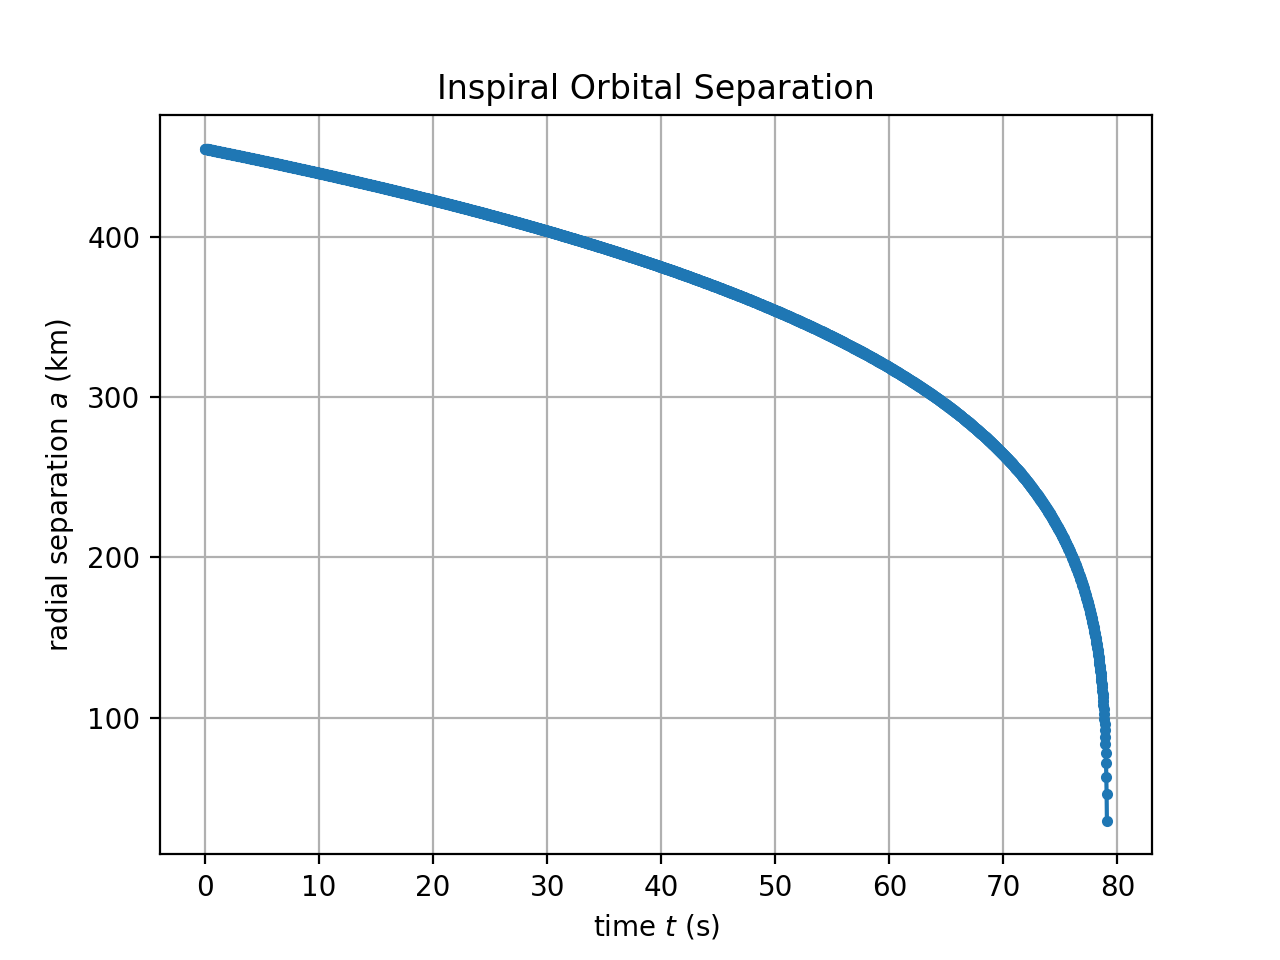

Text(0.5, 1.0, 'Inspiral Orbital Separation')

In [76]:
%matplotlib notebook
pl.plot(t_s, np.array(a_s) / 1000, ".-")
pl.grid()
pl.xlabel(r"time $t$ (s)")
pl.ylabel("radial separation $a$ (km)")
pl.title("Inspiral Orbital Separation")

<IPython.core.display.Javascript object>


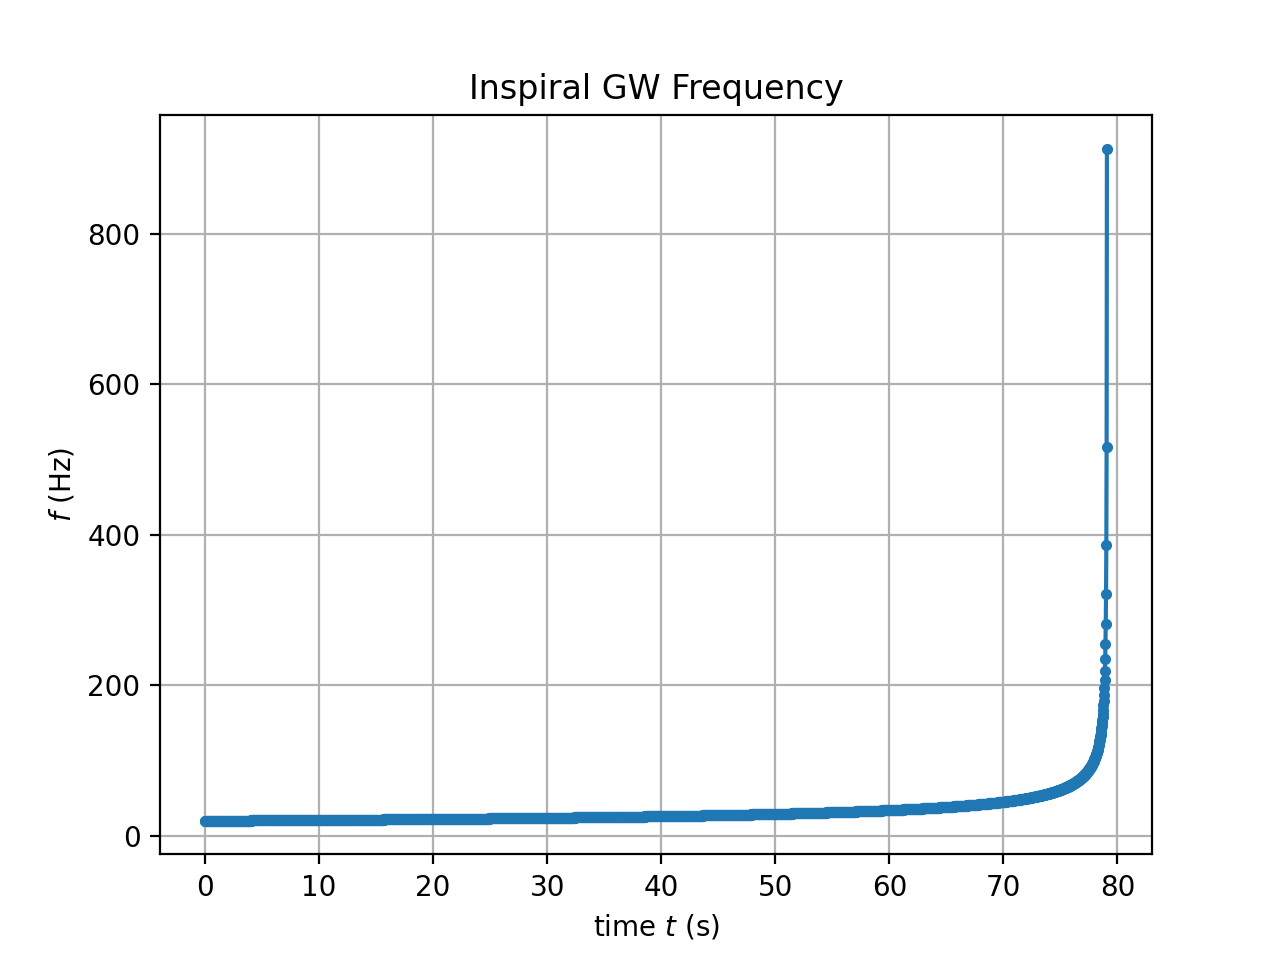

Text(0.5, 1.0, 'Inspiral GW Frequency')

In [77]:
%matplotlib notebook
pl.plot(t_s, fGW_s, ".-")
pl.grid()
pl.xlabel(r"time $t$ (s)")
pl.ylabel(r"$f$ (Hz)")
pl.title("Inspiral GW Frequency")

<IPython.core.display.Javascript object>


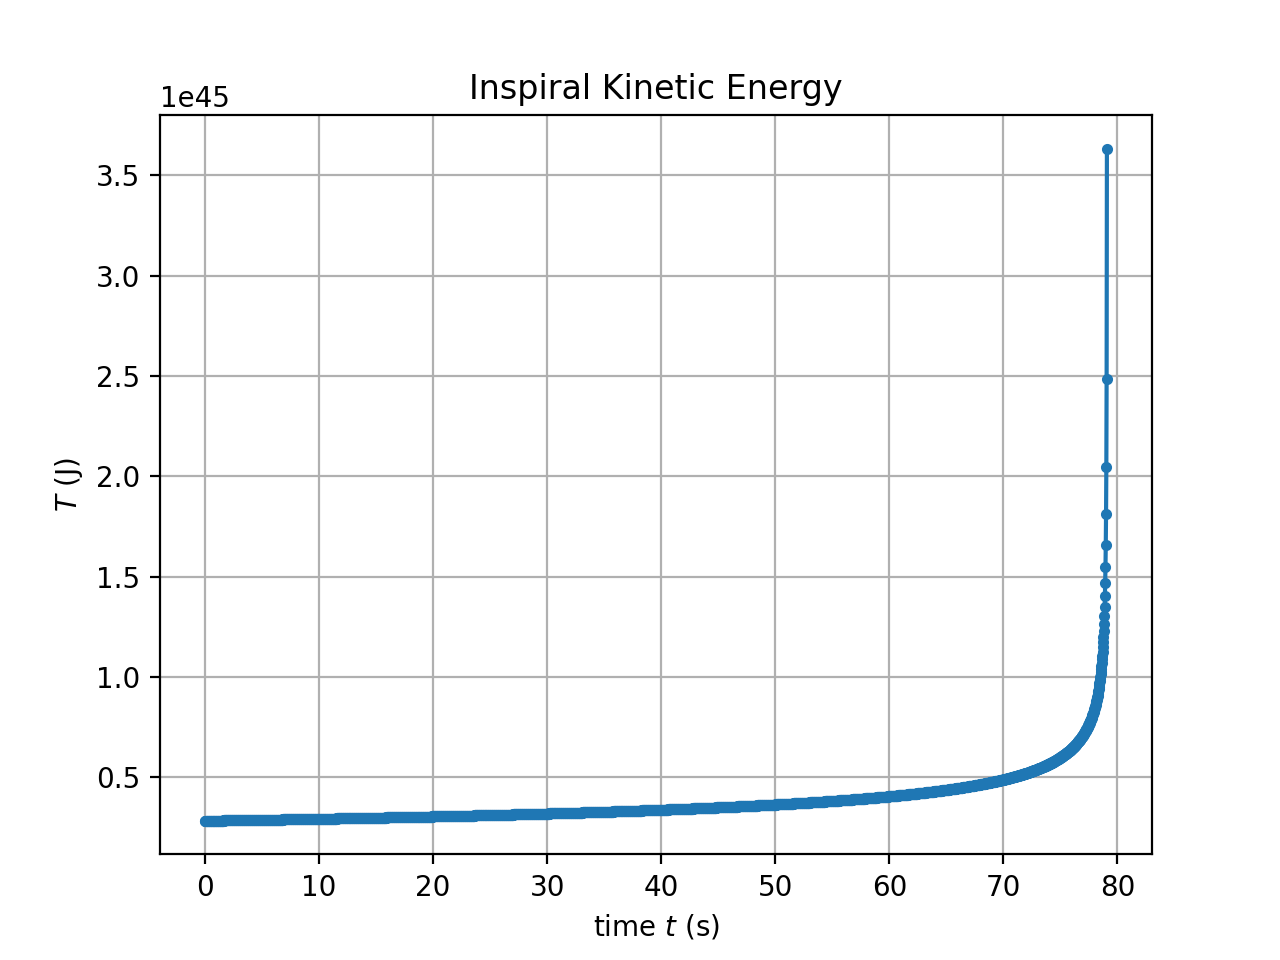

Text(0.5, 1.0, 'Inspiral Kinetic Energy')

In [78]:
%matplotlib notebook
pl.plot(t_s, ke_s, ".-")
pl.grid()
pl.xlabel(r"time $t$ (s)")
pl.ylabel(r"$T$ (J)")
pl.title("Inspiral Kinetic Energy")

<IPython.core.display.Javascript object>


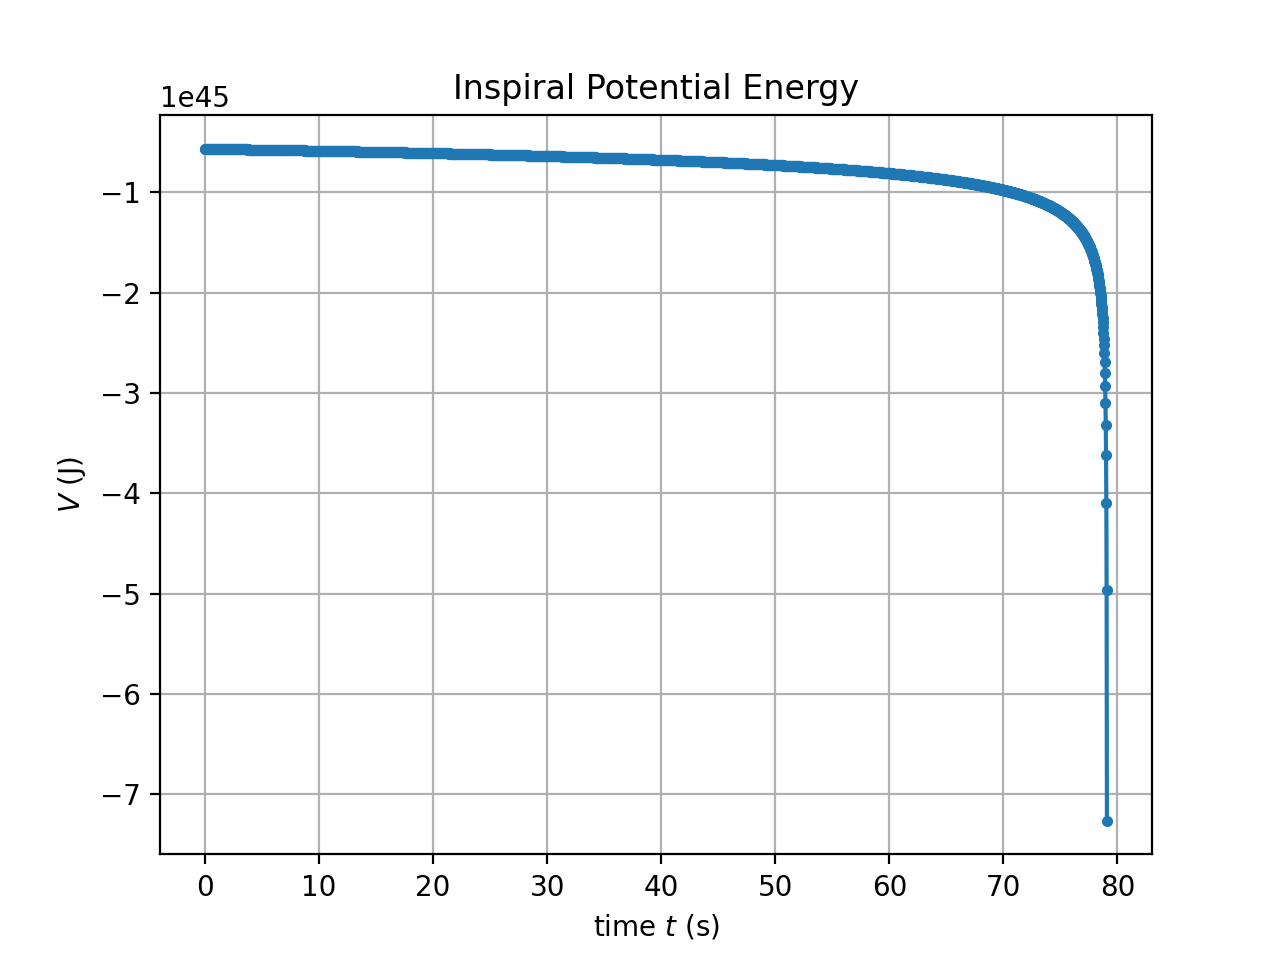

Text(0.5, 1.0, 'Inspiral Potential Energy')

In [79]:
%matplotlib notebook
pl.plot(t_s, pe_s, ".-")
pl.grid()
pl.xlabel(r"time $t$ (s)")
pl.ylabel(r"$V$ (J)")
pl.title("Inspiral Potential Energy")

<IPython.core.display.Javascript object>


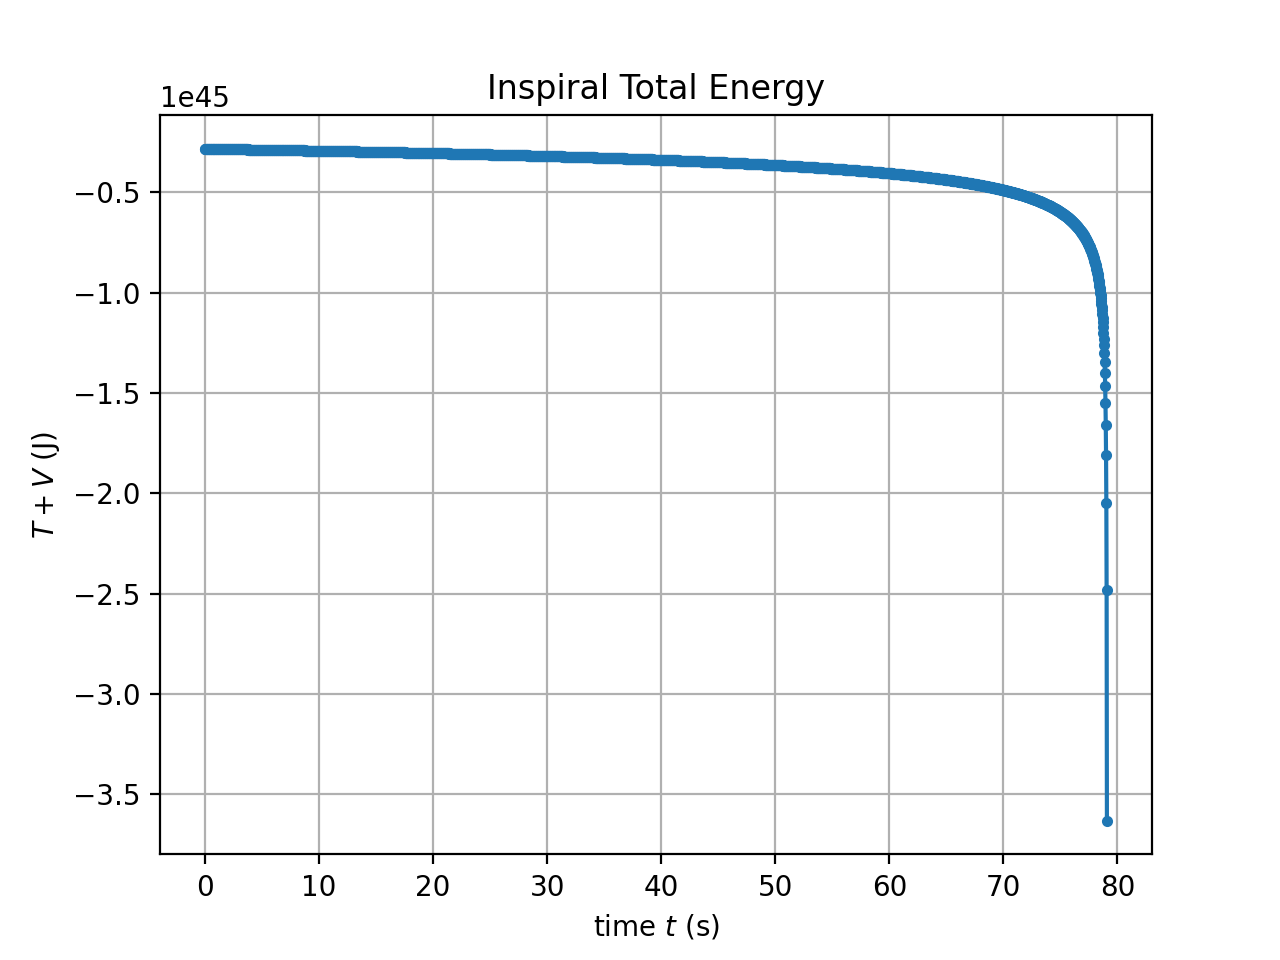

Text(0.5, 1.0, 'Inspiral Total Energy')

In [80]:
%matplotlib notebook
pl.plot(t_s, te_s, ".-")
pl.grid()
pl.xlabel(r"time $t$ (s)")
pl.ylabel(r"$T+V$ (J)")
pl.title("Inspiral Total Energy")

<IPython.core.display.Javascript object>


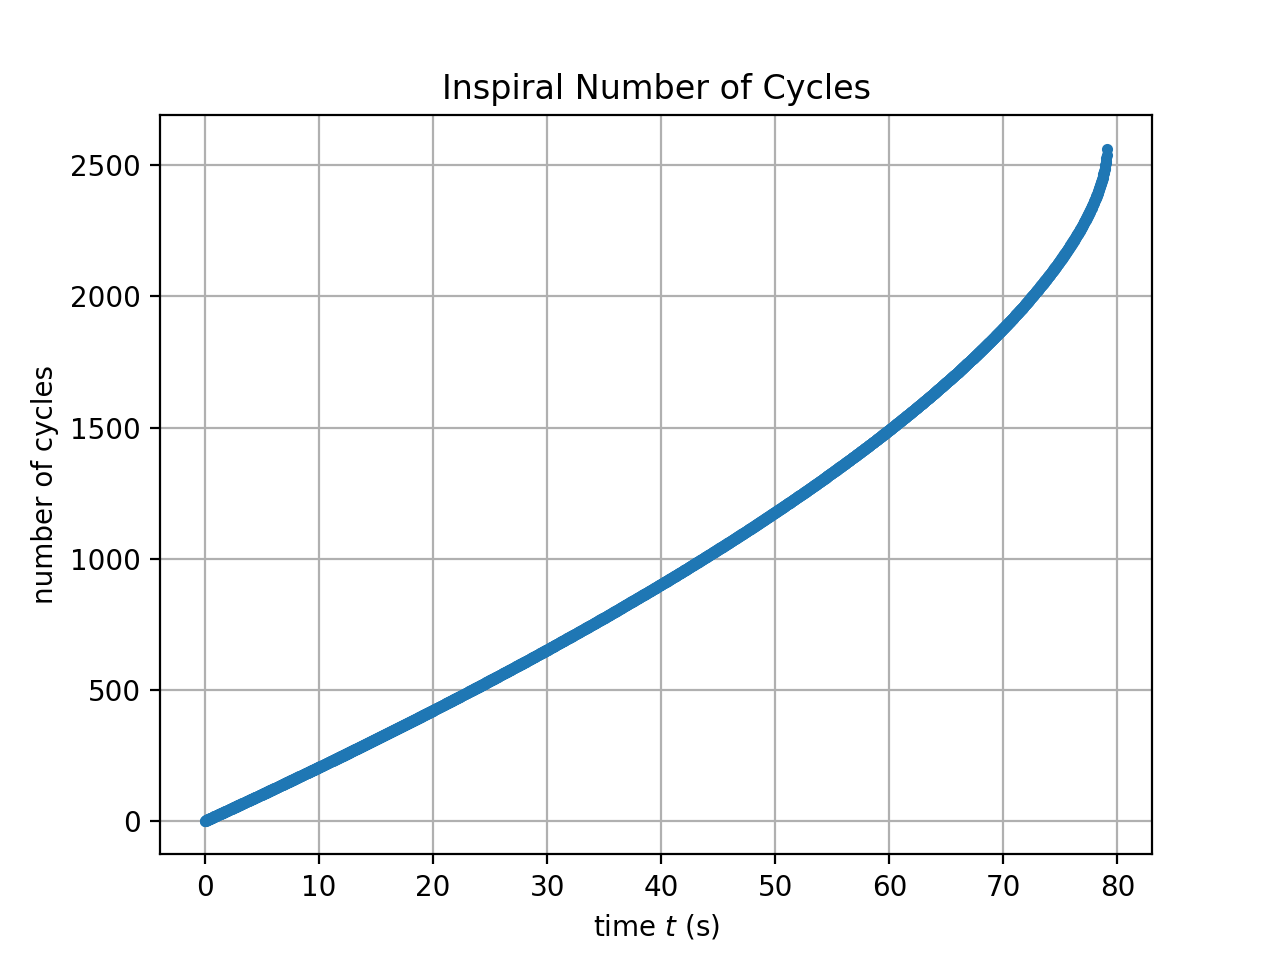

Text(0.5, 1.0, 'Inspiral Number of Cycles')

In [92]:
%matplotlib notebook
pl.plot(t_s, num_cy[1:], ".-")
pl.grid()
pl.xlabel(r"time $t$ (s)")
pl.ylabel(r"number of cycles")
pl.title("Inspiral Number of Cycles")

# Question 15

In [97]:
D = 1 * u.Mpc
(c.G ** 2 * M * mu / (c.c ** 4 * D * a)).to('').unit

Unit(dimensionless)

Thus, GW strain $h(t)$ has no units; it is dimensionless.

In [106]:
phiT = 9
hT_s = []
for i in range(len(a_s)):
    phiT += 2 * np.pi * (fGW_s[i] * dt).value
    hT_s += [(4 * c.G ** 2 * M * mu / (c.c ** 4 * D * a_s[i] * u.m) * np.cos(phiT)).to('').value]

<IPython.core.display.Javascript object>


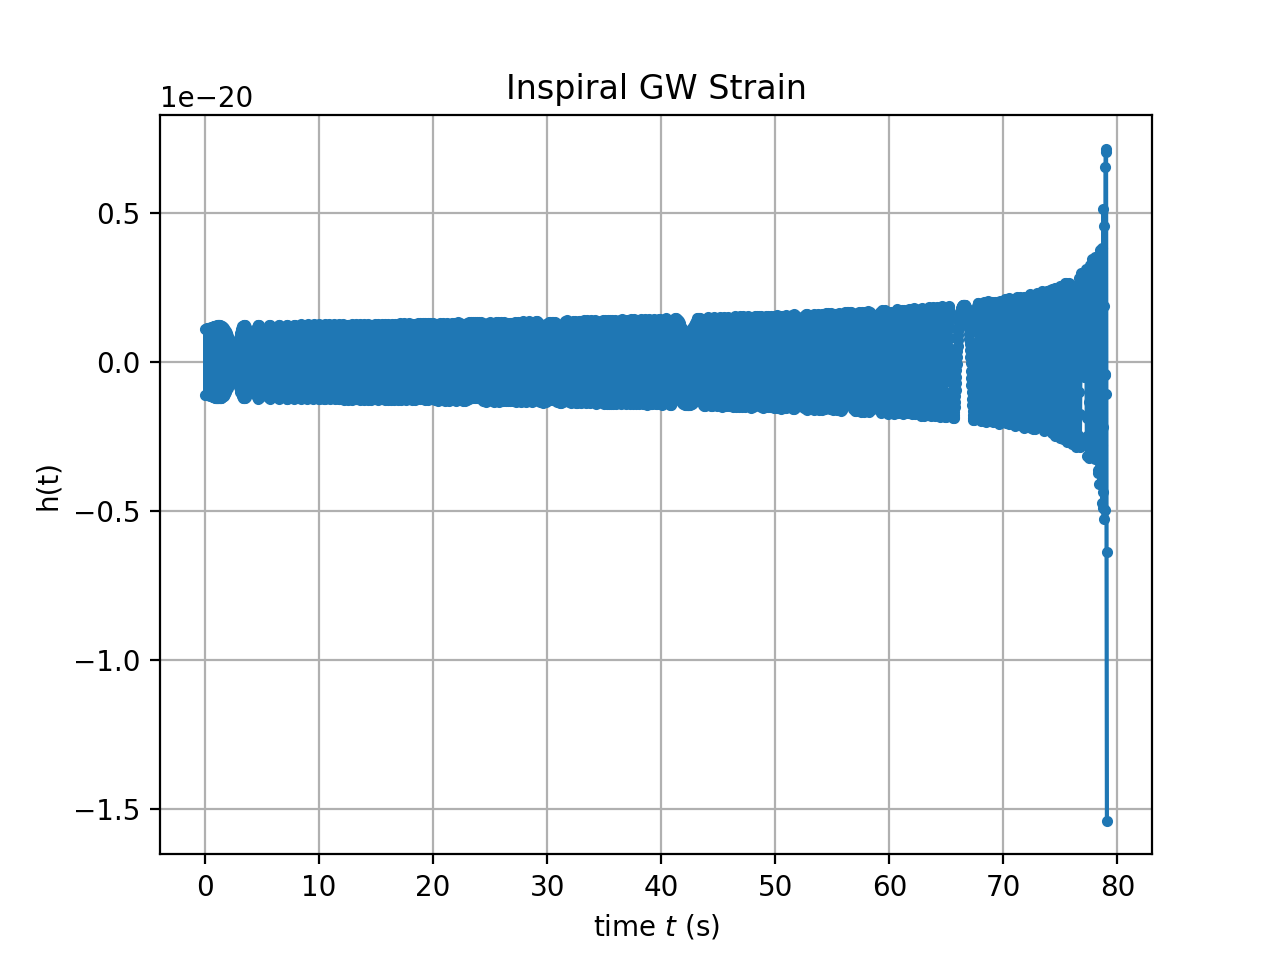

Text(0.5, 1.0, 'Inspiral GW Strain')

In [113]:
%matplotlib notebook
pl.plot(t_s, hT_s, ".-")
pl.grid()
pl.xlabel(r"time $t$ (s)")
pl.ylabel(r"h(t)")
pl.title("Inspiral GW Strain")

As the curve shape is not very obvious, we also plot GW strain at a lower temporal resolution.

<IPython.core.display.Javascript object>


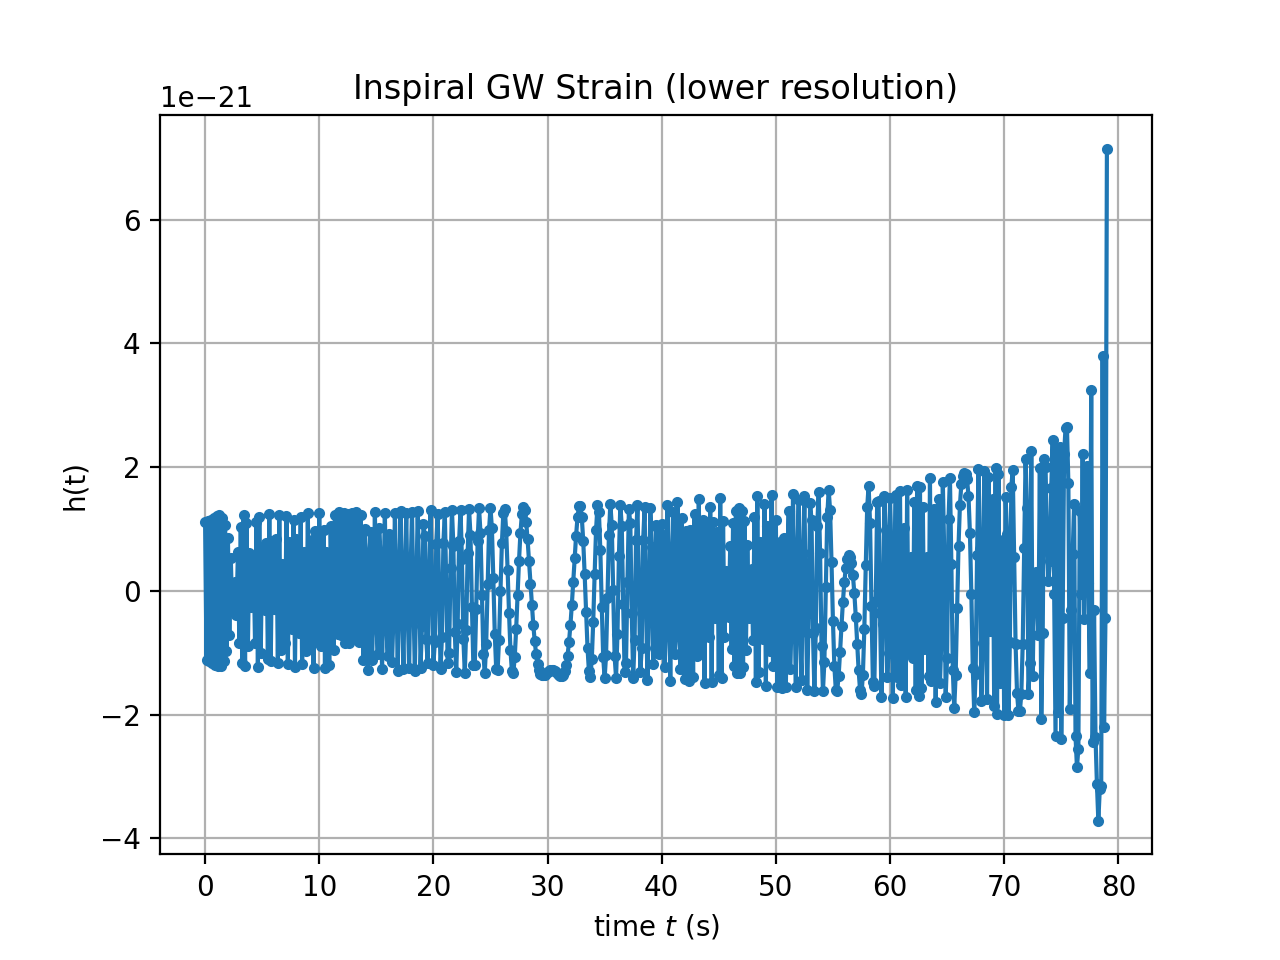

Text(0.5, 1.0, 'Inspiral GW Strain (lower resolution)')

In [116]:
%matplotlib notebook
pl.plot(t_s[::5], hT_s[::5], ".-")
pl.grid()
pl.xlabel(r"time $t$ (s)")
pl.ylabel(r"h(t)")
pl.title("Inspiral GW Strain (lower resolution)")

# Question 18